### task 1

In [559]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

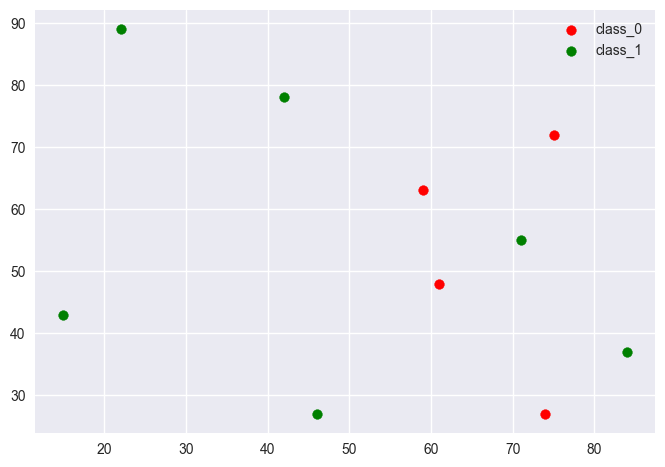

In [560]:
X = np.array([59, 15, 75, 61, 71, 84, 74, 46, 22, 42])
y = np.array([63, 43, 72, 48, 55, 37, 27, 27, 89, 78])
class_ = np.array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

plt.scatter(X[class_ == 0], y[class_ == 0], c = 'r', label = 'class_0')
plt.scatter(X[class_ == 1], y[class_ == 1], c = 'g', label = 'class_1')
plt.grid(True)
plt.legend()
plt.show()

In [561]:
obj = [88, 91]
X_new = [[X[i], y[i]] for i in range(len(X))]

neigh = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
neigh.fit(X_new, class_)
class_pred = neigh.predict([obj])
distance, idx = neigh.kneighbors([obj])

idx += 1
print(f'Расстояние от нового объекта с координатами (88,91) до ближайшего соседа, используя евклидову метрику: {distance[0][0]:.3f}')
print(f'Идентификатры трех ближайших точек: {idx[0]}')
print(f'Класс для нового объекта: {class_pred[0]}')

Расстояние от нового объекта с координатами (88,91) до ближайшего соседа, используя евклидову метрику: 23.022
Идентификатры трех ближайших точек: [3 5 1]
Класс для нового объекта: 0


In [562]:
neigh = KNeighborsClassifier(n_neighbors = 3, metric='manhattan')
neigh.fit(X_new, class_)
class_pred = neigh.predict([obj])
distance, idx = neigh.kneighbors([obj])

idx += 1
print(f'Расстояние от нового объекта с координатами (88,91) до ближайшего соседа, используя манхетанское расстояние: {distance[0][0]:.3f}')
print(f'Идентификатры трех ближайших точек: {idx[0]}')
print(f'Класс для нового объекта: {class_pred[0]}')

Расстояние от нового объекта с координатами (88,91) до ближайшего соседа, используя манхетанское расстояние: 32.000
Идентификатры трех ближайших точек: [3 5 1]
Класс для нового объекта: 0


### task 2

# 0. Применение метода KNN для решения задачи классификации

Набор данных получен в результате переписи населения 1994 года и содержит информацию о некотором количестве людей, проживающих в США. Задача состоит в том, чтобы предсказать, зарабатывает человек более $50к в год или нет. Список признаков:

*   <b>age</b>: возраст человека.
*   <b>workclass</b>: статус занятости.
*   <b>fnlwgt</b>: количество людей, которое, по мнению переписи, представляет запись.
*   <b>education</b>: высший уровень образования, достигнутый человеком.
*   <b>education-num</b>: высший уровень образования, достигнутый человеком в числовой форме.
*   <b>marital-status</b>: семейное положение человека.
*   <b>occupation</b>: общий род занятий человека.
*   <b>relationship</b>: представляет то, чем этот человек является по отношению к другим (перекликается с признаком <b>marital-status</b>).
*   <b>race</b>: раса.
*   <b>sex</b>: пол.
*   <b>capital-gain</b>: прирост капитала.
*   <b>capital-loss</b>: убыток капитала.
*   <b>hours-per-week</b>: число рабочих часов в неделю.
*   <b>native-country</b>: страна происхождения.
*   <b>the label</b>: отклик -- зарабатывает больше $50к или меньше.



## Немного про метрики качества модели

Для начала рассмотрим так называемую матрицу ошибок (confusion matrix)
-- способ разделить объекты на $4$ группы в зависимости от комбинации
истинного класса и ответа классификатора:

-   TP (True Positives) -- верно классифицированные объекты, исходно     относящиеся к классу "$+1$";

-   TN (True Negatives) -- верно классифицированные объекты, исходно     относящиеся к классу "$-1$";

-   FN (False Negatives) -- неверно классифицированные объекты, исходно     относящиеся к классу "$+1$" (ошибка I рода);

-   FP (False Positives) -- неверно классифицированные объекты, исходно     относящиеся к классу "$-1$" (ошибка II рода).

Обычно, конечно, оперируют не абсолютными показателями, а относительными
-- долями (rates), находящимися в диапазоне от $0$ до $1$:

-   доля правильных ответов классификатора (иногда -- точность): $$\mathsf{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}.$$ Эта величина показывает отношение количества верно классифицированных объектов к общему количеству классифицируемых объектов и, грубо говоря, оценивает вероятность случайному объекту быть правильно классифицированным.

-   доля истинно положительных примеров -- True Positives Rate (TPR) или     Sensitivity (чувствительность) или Recall: $$\mathsf{T P R}=\frac{T P}{T P+F N}.$$ Эта величина показывает отношение количества верно классифицированных объектов, относящихся к классу "$+1$", к общему количеству объектов класса "$+1$". Иными словами -- это оценка вероятности, что объект, относящийся к классу "$+1$" будет классифицирован корректно.

-   доля ложно положительных примеров обозначается как -- False Positives Rate (FPR): $$\mathsf{F P R}=\frac{F P}{FP + TN}.$$ Величина показывает отношение количества неверно классифицированных объектов, относящихся к классу "$-1$", к общему количеству объектов класса "$-1$", или оценивает вероятность, что объект, относящийся к классу "$-1$", будет классифицирован неверно.

-   Специфичность (Specificity) или True Negatives Rate (TNR): $$\mathsf{TNR} = 1 - \mathsf{F P R} =\frac{T N}{T N+F P}.$$ Величина показывает отношение количества верно классифицированных объектов, относящихся к классу "$-1$", к общему количеству объектов класса "$-1$", или оценивает вероятность, что объект, относящийся к классу "$-1$", будет классифицирован верно.

-   Precision (точность): $$\mathsf{Precision} =\frac{TP}{TP + FP}.$$ Величина показывает, какая доля объектов, отнесенных классификатором к классу "$+1$", действительно относится к этому классу.

Естественно возникает вопрос, нет ли какого-то обобщающего критерия,
который может характеризовать качество построенной модели. Один из них --
так называемая $F$-мера ($F_1$-мера, $F$ score, $F_1$ score)
определяется следующим соотношением:
$$F = F_1 = 2 \cdot \frac{\mathsf{Precision} \cdot \mathsf{Recall}}{\mathsf{Precision} + \mathsf{Recall}}.$$

**Замечание**. *$F$-мера является средним гармоническим величин
$\mathsf{Precision}$ и $\mathsf{Recall}$ и заключена в диапазоне
$[0, 1]$. Среднее гармоническое обладает важным свойством: оно близко к
нулю, если хотя бы один из аргументов близок к нулю. Поэтому оно является
куда более предпочтительным, чем, скажем, среднее арифметическое: если
алгоритм относит все объекты к положительному классу, то
$\mathsf{Recall}= 1$, а $\mathsf{Precision}$, скорее всего, будет
небольшим. Но тогда среднее арифметическое будет больше, чем $0.5$, что,
конечно, никуда не годится.*

## Импорт библиотек и чтение набора данных

In [563]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer 
import seaborn as sns
from matplotlib import pyplot as plt

Считайте набор данных в датафрейм. Исходя из описания признаков можно сразу избавиться от признаков <code>education</code> и <code>marital-status</code>. Удалите соответствующие колонки из набора данных.

In [564]:
df = pd.read_csv("./data/adult_data_train.csv") 
df = df.drop(columns = ['education', 'marital-status'])

In [565]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education-num      int64
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
label              int64
dtype: object

Определите количество числовых и нечисловых признаков.

In [566]:
print(f'Числовых {(df.dtypes != object).sum()}')
print(f'Нечисловых {(df.dtypes == object).sum()}')

Числовых 7
Нечисловых 6


Постройте гистограмму распределения объектов по классам. Вычислите долю объектов класса $0$.

<AxesSubplot: >

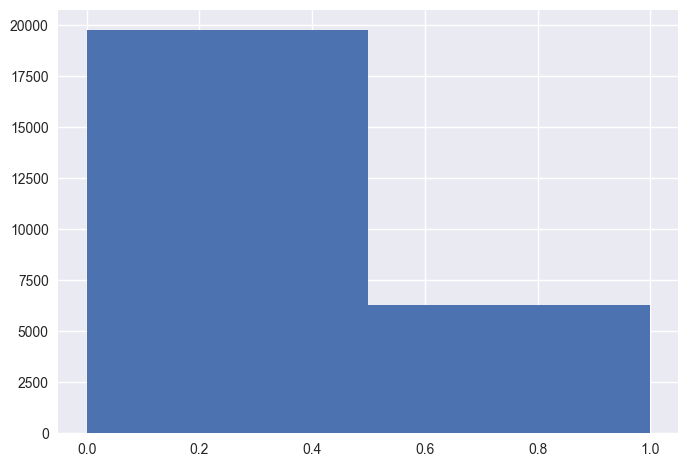

In [567]:
df['label'].hist(bins = 2)

In [568]:
print(f'Доля объектов класса 0: {df[df["label"] == 0]["label"].shape[0] / df.shape[0]:.3f}')

Доля объектов класса 0: 0.759


# 1. Построение базовой модели

В качестве первого приближения имеет смысл построить модель классификации, опираясь исключительно на числовые признаки.

Отберите из набора данных только числовые признаки. При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки <b>с параметрами, указанными в вашем задании</b>. Используйте стратификацию по колонке <code>label</code>.

Вычислите выборочное среднее колонки <code>fnlwgt</code> тренировочного набора данных.

Обучите модель <code>KNeighborsClassifier()</code> с параметрами по умолчанию на тренировочных данных. 

Как видно из предыдущего пункта, в наборе данных наблюдается явный дисбаланс представителей классов. Это следует учесть при оценке модели. Вычислите <code>f1_score</code> модели на тестовых данных (рекомендуем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">соответствующую функцию</a> с параметрами по умолчанию.

В качестве альтернативы можно использовать так называемый <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>classification_report()</code></a>, где приведены сразу несколько метрик (не стоит забывать про параметр <code>digits</code>).

In [569]:
df_numeric = df.select_dtypes(include = ['number'])
df_numeric = df_numeric.drop(columns = ['label'])

X = df_numeric
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 65,
                                                    stratify = df['label'])

print(f'Выборочное среднее колонки fnlwgt тренировочного набора данных: {X_train["fnlwgt"].mean():.3f}')

Выборочное среднее колонки fnlwgt тренировочного набора данных: 189781.299


In [570]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print(f'f1_score() для тестового набора данных: {f1_score(y_test, y_pred):.3f}')

f1_score() для тестового набора данных: 0.406


Стоит помнить, что KNN является метрическим классификатором, поэтому значения признаков перед обучением модели следует нормировать.

Обучите преобразование <code>MinMaxScaler()</code> на тренировочном наборе данных и примените его для тренировочных и тестовых данных.

Вычислите выборочное среднее колонки <code>fnlwgt</code> тренировочного набора данных после нормировки.

Заново обучите и оцените модель на преобразованных данных. Вычислите <code>f1_score()</code> модели.

In [571]:
scaler = MinMaxScaler()
scaler.fit(X_train).set_output(transform='pandas')

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Выборочное среднее колонки fnlwgt полученного тренировочного набора данных: {X_train_scaled["fnlwgt"].mean():.3f}')

Выборочное среднее колонки fnlwgt полученного тренировочного набора данных: 0.121


In [572]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_scaled, y_train)

y_pred = neigh.predict(X_test_scaled)

print(f'f1_score() для тестового набора данных: {f1_score(y_test, y_pred):.3f}')

f1_score() для тестового набора данных: 0.528


Видно, что после линейной нормировки качество выросло. 

<b>Важно: </b>На дальнейших этапах подразумевается использование линейной нормировки непосредственно перед обучением без дополнительных напоминаний.

# 2. Работа с нечисловыми признаками

## Визуализация

Для дальнейшего улучшения качества модели имеет смысл задействовать нечисловые признаки исходного датасета (без колонок <code>education</code> и <code>marital-status</code>). 

Постройте гистограммы, иллюстрирующие частоту того или иного значения по каждому нечисловому признаку, например, при помощи <code>sns.barplot()</code>.

Нечисловые столбцы для визуализации:
['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country']


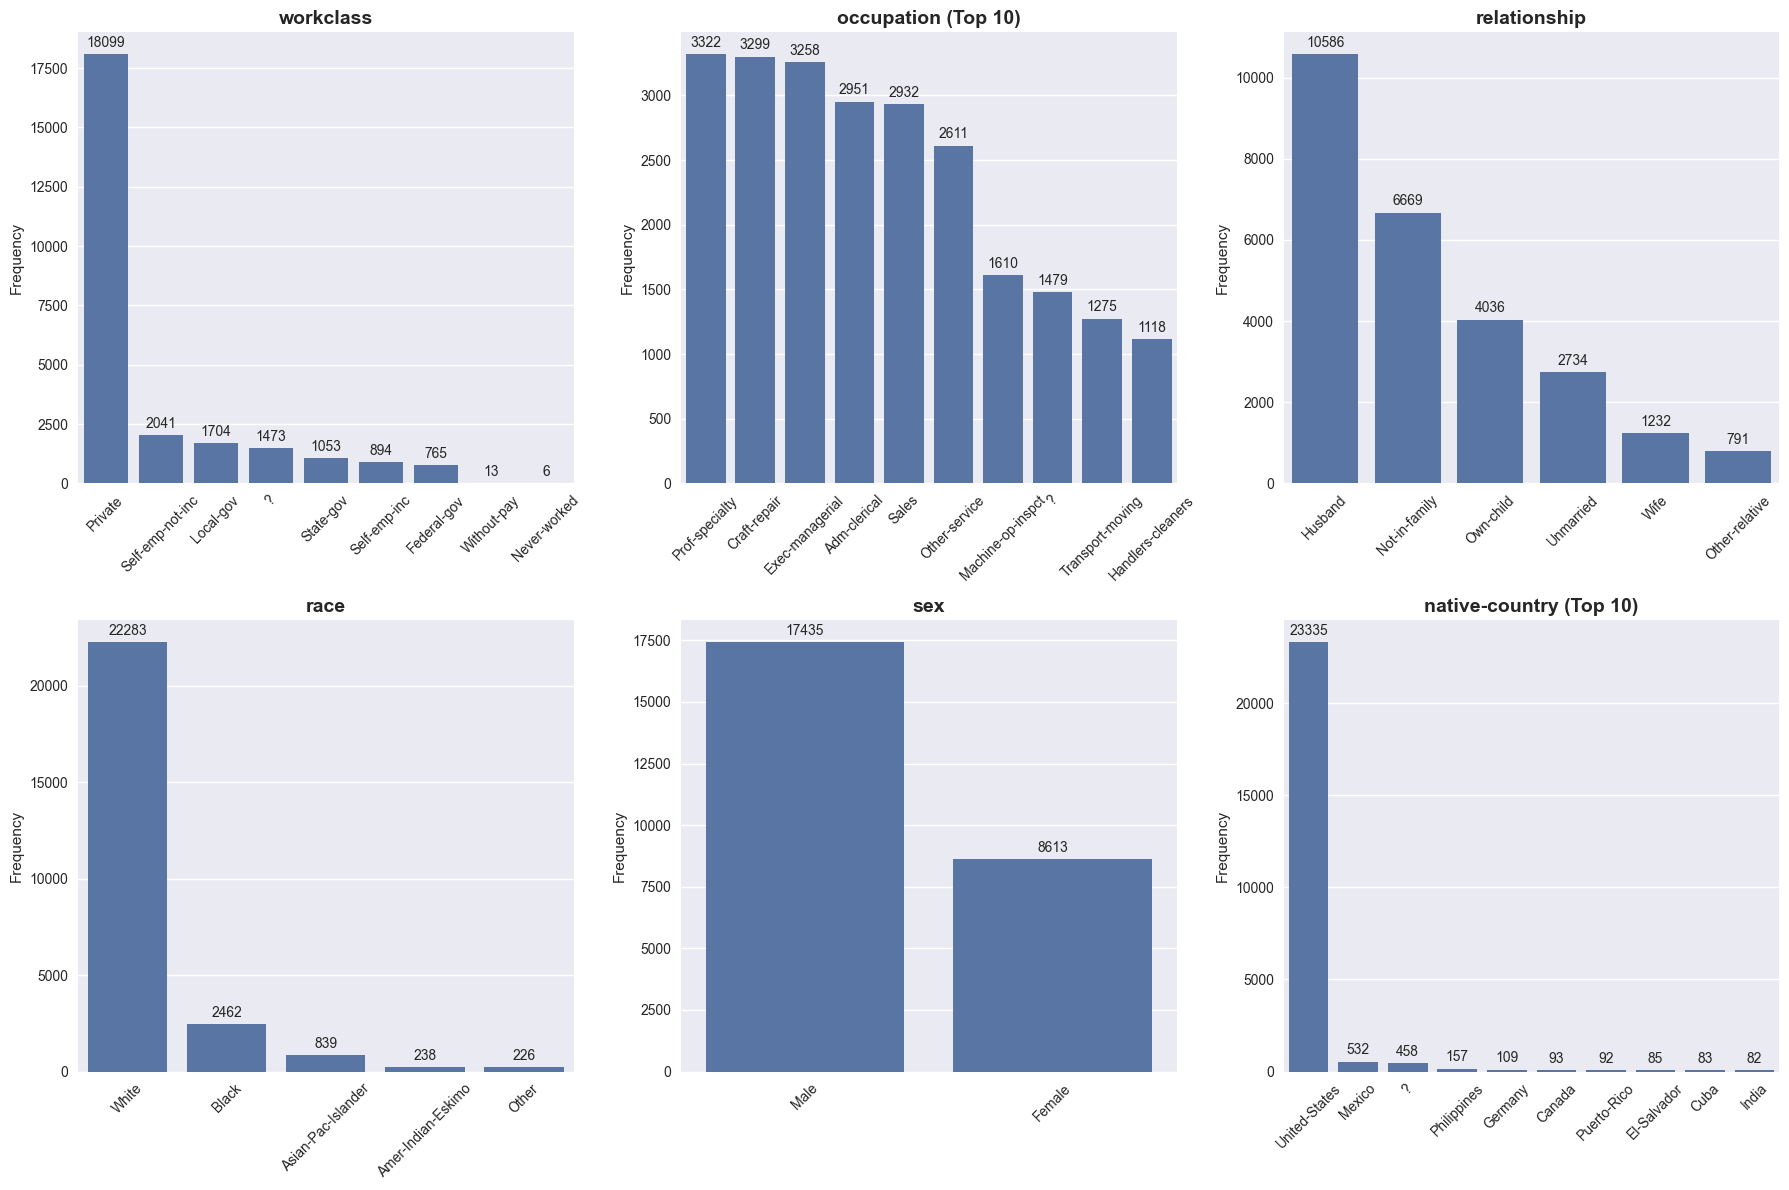

In [573]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Нечисловые столбцы для визуализации:")
print(categorical_columns)

# Настроим внешний вид графиков
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Построим гистограммы для каждого категориального признака
for i, col in enumerate(categorical_columns):
    if i < len(axes):
        # Считаем частоты значений
        value_counts = df[col].value_counts()
        
        # Если уникальных значений слишком много, берем топ-10
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)
            title = f'{col} (Top 10)'
        else:
            title = col
        
        # Строим barplot
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
        axes[i].set_title(title, fontsize=14, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Добавляем значения на столбцы
        for j, v in enumerate(value_counts.values):
            axes[i].text(j, v + max(value_counts.values)*0.01, str(v), 
                        ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Удаление пропущенных значений

Определите число строк исходного набора данных (без колонок <code>education</code> и <code>marital-status</code>), в которых присутствует хотя бы одно пропущенное значение.

In [574]:
df_filtered = df.replace('?', np.nan)
print(f"Число строк исходного набора данных, в которых присутствует хотя бы одно пропущенное значение: {df_filtered.isnull().any(axis=1).sum()}")

Число строк исходного набора данных, в которых присутствует хотя бы одно пропущенное значение: 1914


Видно, что в датасете содержится менее 10% строк, содержащих пропуски. Выкидывать такое количество строк — не очень хорошее дело, но почему бы не попробовать обойтись без них. 

Удалите строки, содеражащие пропуски. Произведите <code>one-hot</code> кодировние нечисловых признаков, например, с помощью <code>pd.get_dummies(drop_first=True)</code>.

Введите число полученных признаков.

In [575]:
df_clean = df_filtered.dropna()

dummies = pd.get_dummies(df_clean[categorical_columns], drop_first=True)
df_clean = df_clean.drop(categorical_columns, axis=1)
df_clean = pd.concat([df_clean, dummies], axis=1)

print(f'Общее число полученных признаков: {df_clean.shape[1] - 1}')

Общее число полученных признаков: 75


Обучите модель классификации аналогично тому, как это было проделано для базовой модели. Вычислите <code>f1_score()</code> модели.



In [576]:
X = df_clean.drop(columns = ['label'])
y = df_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 65,
                                                    stratify = df_clean['label'])

In [577]:
scaler = MinMaxScaler()
scaler.fit(X_train).set_output(transform='pandas')

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'{X_train_scaled["fnlwgt"].mean():.3f}')

0.120


In [578]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_scaled, y_train)

y_pred = neigh.predict(X_test_scaled)

print(f'f1_score() для тестового набора данных: {f1_score(y_test, y_pred):.3f}')

f1_score() для тестового набора данных: 0.630


Точность модели увеличилась по сравнению с моделью, которая использовала только числовые признаки.

## Заполнение пропущенных значений

Возможно точность еще повысится, если задействовать строки с пропущенными значениями. Используя исходный датасет (без колонок <code>education</code> и <code>marital-status</code>), заполните пропуски самым часто встречающимся значением в рамках столбца.

In [579]:
df_filled = df.replace('?', np.nan).fillna(df.mode().iloc[0])

Далее по уже знакомому сценарию: <code>one-hot</code>, <code>split</code>, <code>scaling</code>, обучение и оценка.

Вычислите <code>f1_score()</code> модели.

In [580]:
dummies = pd.get_dummies(df_filled[categorical_columns], drop_first=True)

df_filled = df_filled.drop(categorical_columns, axis=1)
df_filled = pd.concat([df_filled, dummies], axis=1)

print(f'Общее число полученных признаков: {df_filled.shape[1] - 1}')

Общее число полученных признаков: 76


In [581]:
X = df_filled.drop(columns = ['label'])
y = df_filled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 65,
                                                    stratify = df_filled['label'])

In [582]:
scaler = MinMaxScaler()
scaler.fit(X_train).set_output(transform='pandas')

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [583]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_scaled, y_train)

y_pred = neigh.predict(X_test_scaled)

print(f'f1_score() для тестового набора данных: {f1_score(y_test, y_pred):.3f}')

f1_score() для тестового набора данных: 0.601


## Проклятие размерности

В последнем пункте был получен набор данных, содержащий 76 признаков (кстати, попробуйте объяснить, почему в случае удаления строк число признаков в итоге оказалось равным 75), что является достаточным для того, чтобы столкнуться с так называемым проклятием размерности.

Для того, чтобы классификатор давал более качественные результаты, имеет смысл более внимательно и вдумчиво поработать с признаками с учетом проклятия размерности. Например, вернуть в рассмотрение признаки <code>education-num</code> и <code>marital-status</code>. А также более глубоко вникнуть в саму природу признаков.

### task 3

In [596]:
df_train = pd.read_csv("./data/adult_data_train.csv")
df_test = pd.read_csv("./data/adult_data_reserved.csv")

deletable = ["education", "marital-status"]
df_train = df_train.drop(columns=deletable)
df_test = df_test.drop(columns=deletable)

In [597]:
df_train.replace("?", np.nan).fillna(df_train.mode().iloc[0])
df_test.replace("?", np.nan).fillna(df_train.mode().iloc[0])

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,31,Self-emp-inc,117963,16,Prof-specialty,Own-child,White,Male,0,0,40,United-States
1,20,Private,201490,10,Prof-specialty,Own-child,White,Male,0,0,40,United-States
2,78,Self-emp-inc,385242,13,Exec-managerial,Husband,White,Male,9386,0,45,United-States
3,32,Private,164197,13,Craft-repair,Husband,White,Male,0,0,44,United-States
4,61,Private,92691,9,Adm-clerical,Husband,White,Male,0,0,3,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
6508,42,Self-emp-not-inc,32185,13,Farming-fishing,Husband,White,Male,0,0,60,United-States
6509,34,Private,180714,10,Transport-moving,Husband,Black,Male,0,2179,40,United-States
6510,39,Private,202027,15,Prof-specialty,Husband,White,Male,0,0,45,United-States
6511,29,Private,125976,9,Sales,Unmarried,White,Female,0,0,35,United-States


In [600]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [601]:
X_train = df_train.drop(columns = ['label'])
y_train = df_train['label']

for i, col in enumerate(X_train.columns):
    if col not in df_test.columns:
        df_test.insert(loc=i, column=col, value=0)

In [602]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(df_test)

In [617]:
%%time
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)

CPU times: total: 1min 28s
Wall time: 38.6 s


c:\Users\mshsv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [607]:
print(list(mlp.predict(X_test_scaled)), sep="\n")

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [615]:
neigh = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
neigh.fit(X_train_scaled, y_train)

y_pred = neigh.predict(X_test_scaled)

print(*y_pred)

1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 